In [143]:
bets = read.csv('C:/Users/gizem/OneDrive/Masaüstü/MS-3/IE582 - Data Mining/Homeworks - gizemgunes/bets.csv',header = T, sep=",")
booking = read.csv('C:/Users/gizem/OneDrive/Masaüstü/MS-3/IE582 - Data Mining/Homeworks - gizemgunes/booking.csv',header = T, sep=",")
goals = read.csv('C:/Users/gizem/OneDrive/Masaüstü/MS-3/IE582 - Data Mining/Homeworks - gizemgunes/goals.csv',header = T, sep=",")
matches = read.csv('C:/Users/gizem/OneDrive/Masaüstü/MS-3/IE582 - Data Mining/Homeworks - gizemgunes/matches.csv',header = T, sep=",")
stats = read.csv('C:/Users/gizem/OneDrive/Masaüstü/MS-3/IE582 - Data Mining/Homeworks - gizemgunes/stats.csv',header = T, sep=",")

In [144]:
#Unix epoch times are transformed as following :
matches$date = as_datetime(matches$epoch)

In [145]:
#Necessary columns are selected as following :
task1_matches = select(matches, match_id, match_status, match_hometeam_score, match_awayteam_score, league_id)
task1_matches = filter(task1_matches, match_status == "Finished",league_id == 148)

In [146]:
#Difference column is added as following :
task1_matches$difference = task1_matches$match_hometeam_score - task1_matches$match_awayteam_score

# Task 1 

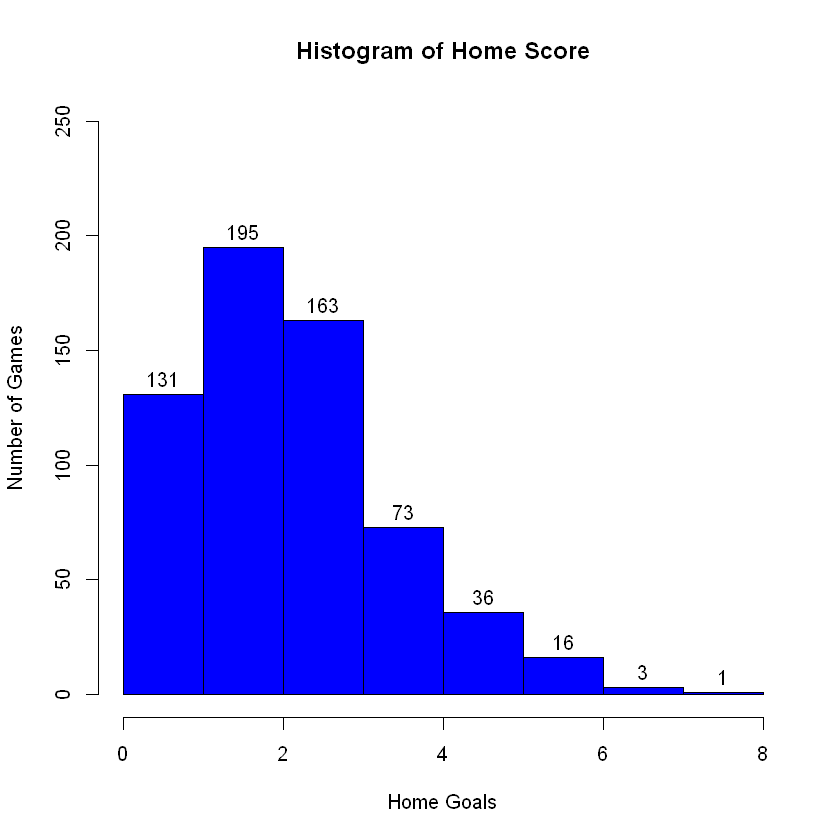

In [147]:
#Part-1.a
home_hist = hist(task1_matches$match_hometeam_score, 
                 main = "Histogram of Home Score", 
                 ylab = "Number of Games", 
                 xlab= "Home Goals",
                 right = F,
                 ylim=c(0,250),
                 include.lowest = TRUE,
                 col = "blue",
                 freq = TRUE)
text(home_hist$mids,home_hist$counts,labels=home_hist$counts, adj=c(0.5,-0.5))


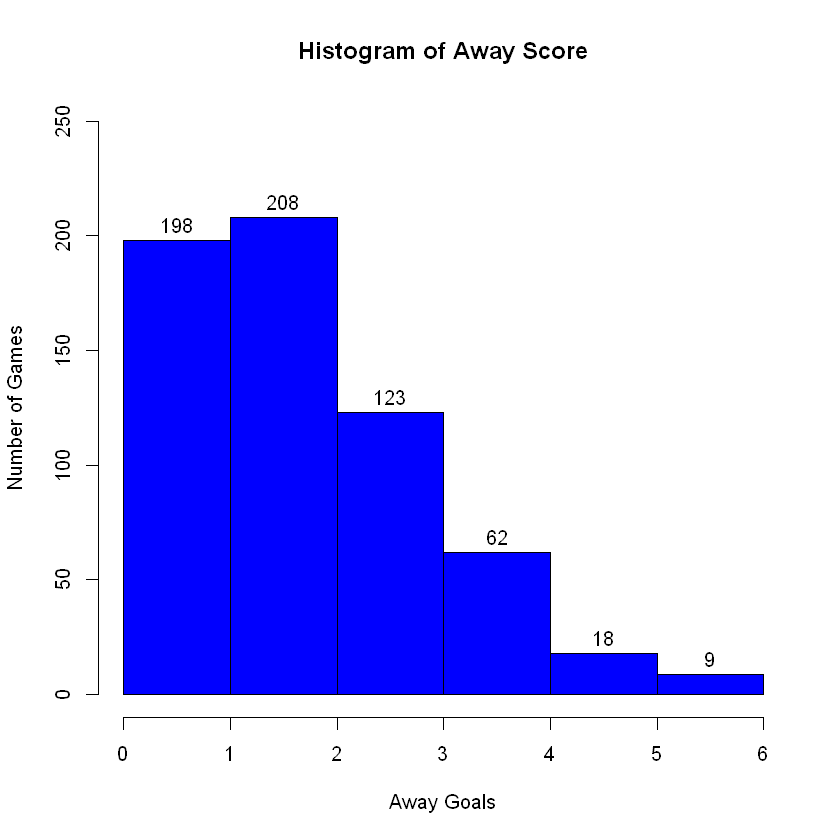

In [148]:
#Part-1.b
away_hist = hist(task1_matches$match_awayteam_score, 
                 main = "Histogram of Away Score", 
                 ylab = "Number of Games", 
                 xlab= "Away Goals",
                 right = F,
                 ylim=c(0,250),
                 include.lowest = TRUE,
                 col = "blue",
                 breaks = 7,
                 freq = TRUE)
text(away_hist$mids,away_hist$counts,labels=away_hist$counts, adj=c(0.5,-0.5))

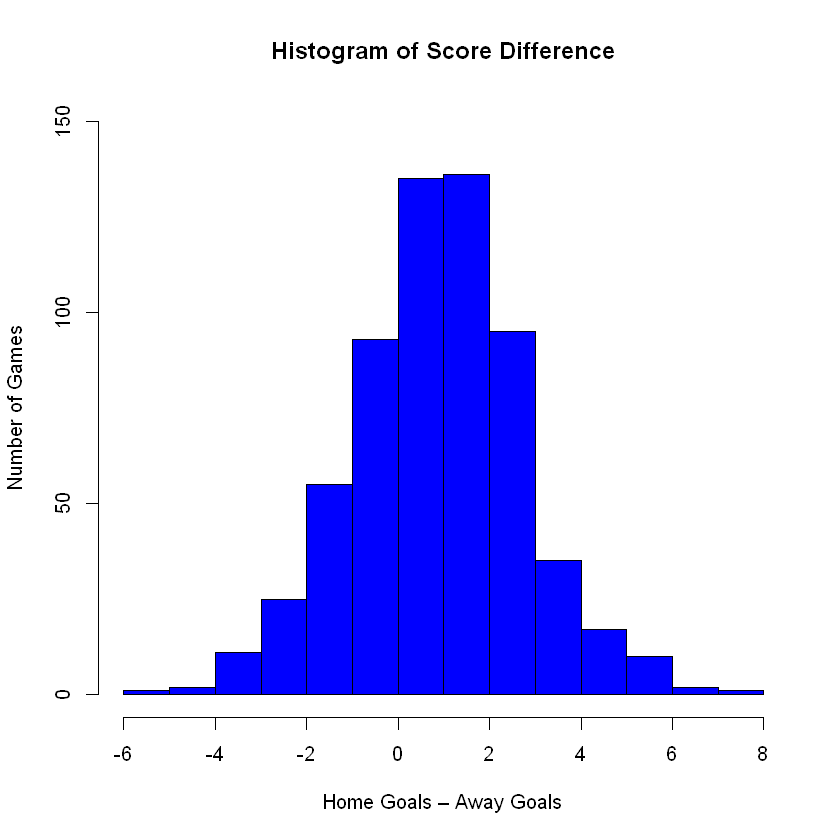

In [149]:
#Part-1.c
difference_hist = hist(task1_matches$difference, 
                       main = "Histogram of Score Difference", 
                       ylab = "Number of Games", 
                       xlab= "Home Goals – Away Goals",
                       right = F,
                       ylim=c(0,150),
                       col="blue",
                       include.lowest = TRUE,
                       freq = TRUE)


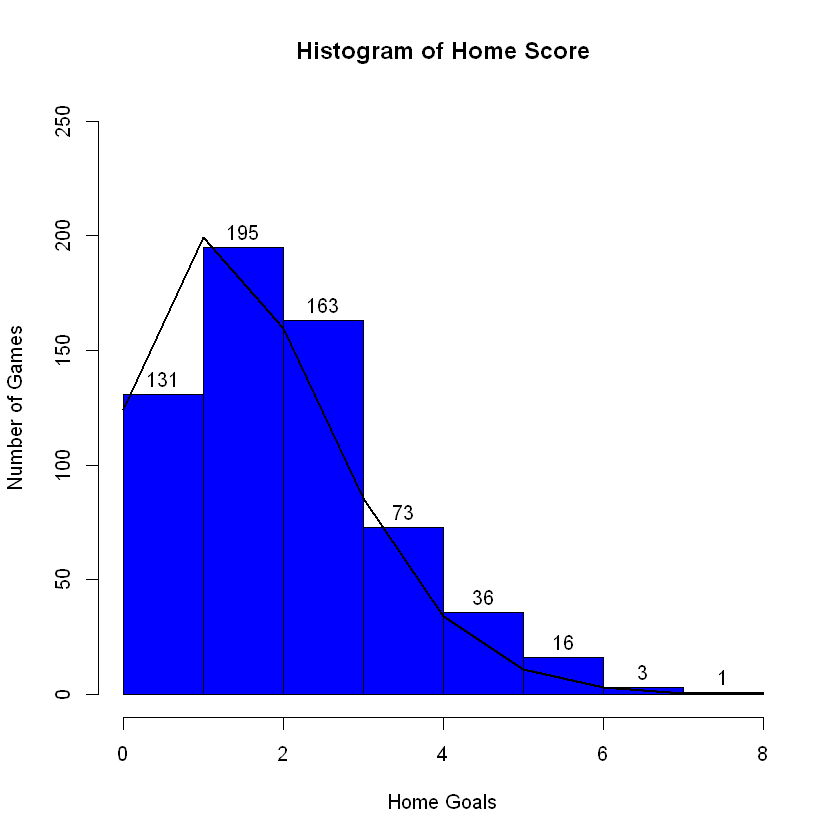

In [150]:
#Part 2 - a.HomeTeam
#Poisson distribution is drawn as following :
home_hist = hist(task1_matches$match_hometeam_score, 
                 main = "Histogram of Home Score", 
                 ylab = "Number of Games", 
                 xlab= "Home Goals",
                 right = F,
                 ylim=c(0,250),
                 include.lowest = TRUE,
                 col="blue",
                 freq = TRUE)
text(home_hist$mids,home_hist$counts,labels=home_hist$counts, adj=c(0.5,-0.5))

home_lambda = mean(task1_matches$match_hometeam_score)
home_x_fit = seq(min(task1_matches$match_hometeam_score),max(task1_matches$match_hometeam_score))
home_y_fit = dpois(x = home_x_fit, lambda = home_lambda)
home_y_fit = home_y_fit*diff(home_hist$mids[1:2])*length(task1_matches$match_hometeam_score)

lines(home_x_fit,home_y_fit,lwd=2)

In [151]:
#Here, it is observed that this histogram  is similar to Poisson distribution with lambda = 1,60.

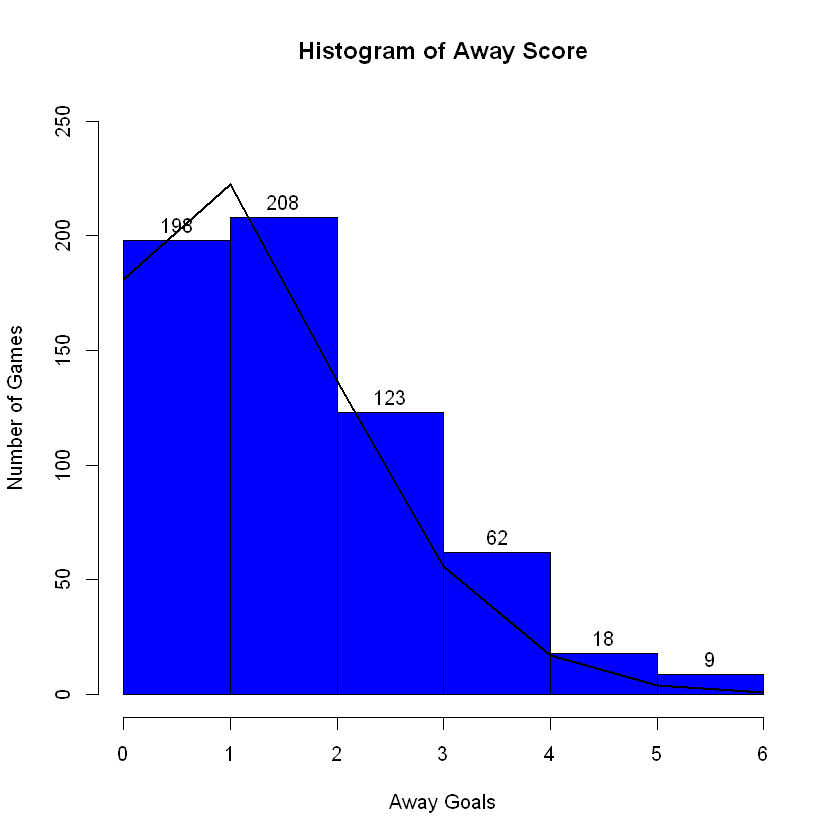

In [152]:
#Part 2 - b.AwayTeam
#Poisson distribution is drawn as following :
away_hist = hist(task1_matches$match_awayteam_score, 
                 main = "Histogram of Away Score", 
                 ylab = "Number of Games", 
                 xlab= "Away Goals",
                 right = F,
                 ylim=c(0,250),
                 include.lowest = TRUE,
                 col="blue",
                 breaks = 7,
                 freq = TRUE)
text(away_hist$mids,away_hist$counts,labels=away_hist$counts, adj=c(0.5,-0.5))

away_lambda = mean(task1_matches$match_awayteam_score)

away_x_fit = seq(min(task1_matches$match_awayteam_score),max(task1_matches$match_awayteam_score))
away_y_fit = dpois(x = away_x_fit, lambda = away_lambda)
away_y_fit = away_y_fit*diff(away_hist$mids[1:2])*length(task1_matches$match_awayteam_score)

lines(away_x_fit,away_y_fit,lwd=2)

In [153]:
#Here again, it is observed that this histogram is similar to Poisson distribution with lambda = 1,23.

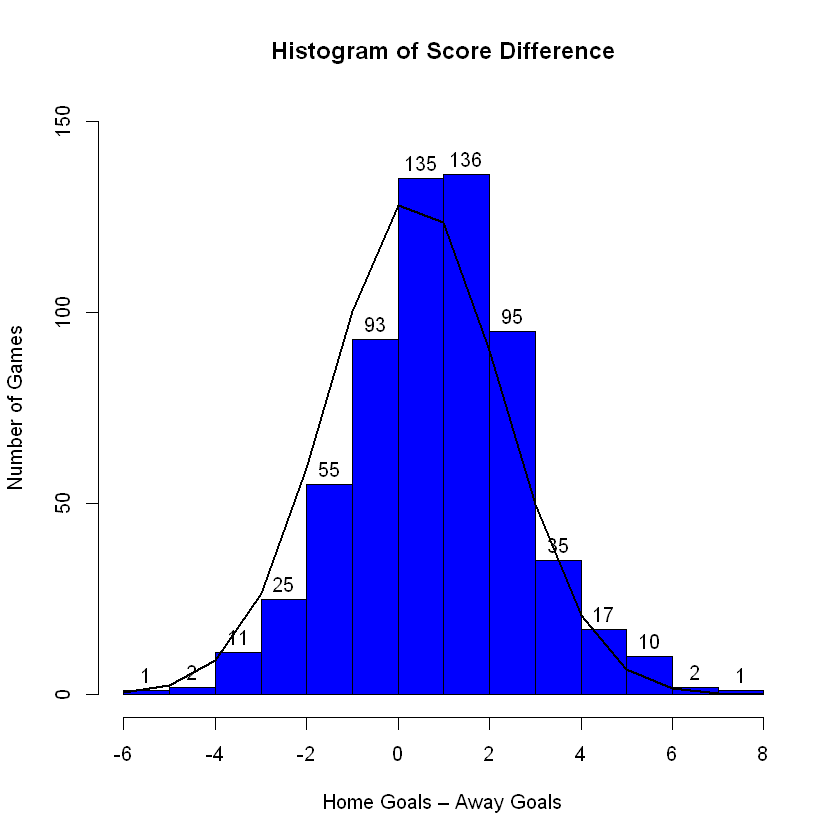

In [154]:
#Part 3 - c.Home Goals – Away Goals
#Normal distribution is drawn as following :
difference_hist = hist(task1_matches$difference, 
                       main = "Histogram of Score Difference", 
                       ylab = "Number of Games", 
                       xlab= "Home Goals – Away Goals",
                       right = F,
                       ylim=c(0,150),
                       col="blue",
                       include.lowest = TRUE,
                       freq = TRUE)
text(difference_hist$mids,difference_hist$counts,labels=difference_hist$counts, adj=c(0.5,-0.5))

diff_x_fit = seq(min(task1_matches$difference),max(task1_matches$difference))
diff_y_fit = dnorm(x = diff_x_fit, mean = mean(task1_matches$difference), sd=sd(task1_matches$difference))
diff_y_fit = diff_y_fit*diff(difference_hist$mids[1:2])*length(task1_matches$difference)

lines(diff_x_fit,diff_y_fit,lwd=2)

In [155]:
#It is observed that this histogram is similar to Normal distribution with mean = 0,37 and standard deviation = 1,89.

# Task 2

In [156]:
#The data which contains necessary info for this task is obtained as following :
task2_matches = select(matches, match_id, match_status, match_hometeam_score, match_awayteam_score, league_id)
task2_matches = filter(task2_matches, match_status == "Finished", league_id == 148)
bets$date = as_datetime(bets$odd_epoch)
task2_bets = select(bets, -odd_epoch)
task2_data = left_join (x=task2_matches,y=task2_bets, by="match_id",all.x= TRUE)

In [157]:
#Match result column is created as following :
task2_data$match_result = ifelse(task2_data$match_hometeam_score == task2_data$match_awayteam_score,"x",
                                 ifelse (task2_data$match_hometeam_score > task2_data$match_awayteam_score, "1", "2"))

In [158]:
#When this data is examined, it is observed that there is NA values.
task2_logic = complete.cases(task2_data)
task2_data = task2_data[task2_logic,]

In [159]:
#Probability is calculated as following :
task2_data$probability = 1/task2_data$value

In [160]:
#There is too much unnecessary column in the data, so only necessary columns are selected as following :
task2_data = select(task2_data, match_id, date, odd_bookmakers, match_result, variable, probability)
task2_data = filter(task2_data, variable == "odd_x" | variable == "odd_1"| variable == "odd_2")

# Task 2 - Bookmaker1 = 1xBet

In [176]:
#1xBet is chosen as the first bookmaker.
task2_bookmaker1 = filter(task2_data, odd_bookmakers == "1xBet")

In [177]:
#Normalization is calculated as following :
task2_bookmaker1 = select(task2_bookmaker1, -odd_bookmakers, -match_result)
task2_b1_data = dcast(task2_bookmaker1, match_id + date ~ variable, value.var = "probability")
task2_b1_data$sum = task2_b1_data$odd_1 + task2_b1_data$odd_x + task2_b1_data$odd_2
task2_b1_data$norm_odd_1 = task2_b1_data$odd_1 / task2_b1_data$sum
task2_b1_data$norm_odd_2 = task2_b1_data$odd_2 / task2_b1_data$sum
task2_b1_data$norm_odd_x = task2_b1_data$odd_x / task2_b1_data$sum

In [178]:
#Dataframe structure is shown below.
task2_b1_data[1:5,]

match_id,date,odd_1,odd_2,odd_x,sum,norm_odd_1,norm_odd_2,norm_odd_x
150842,2017-02-10 07:23:41,0.1960784,0.5649718,0.2702703,1.031320,0.1901237,0.5478140,0.2620624
150844,2017-02-10 07:23:46,0.3236246,0.4065041,0.3030303,1.033159,0.3132379,0.3934574,0.2933046
156845,2017-03-18 08:43:21,0.4166667,0.2824859,0.3225806,1.021733,0.4078038,0.2764771,0.3157191
156847,2017-03-19 08:22:53,0.5494505,0.2074689,0.2673797,1.024299,0.5364161,0.2025472,0.2610367
156850,2017-03-19 08:23:32,0.5555556,0.1923077,0.2793296,1.027193,0.5408483,0.1872167,0.2719349


In [179]:
#P(home win) - P(away win) values are calculated and are discretized into bins as following :
result = distinct(select(task2_data, match_id, match_result))
task2_b1_data$difference = task2_b1_data$norm_odd_1 - task2_b1_data$norm_odd_2
task2_b1_data = select(task2_b1_data, match_id, norm_odd_1, norm_odd_x, norm_odd_2, difference)
task2_b1_data  = left_join(x=task2_b1_data, y=result, by = "match_id", all.x =TRUE)
task2_b1_data$bin = cut(task2_b1_data$difference,breaks = seq(-1,1,0.2))

In [180]:
#P(draw) is calculated as following :
task2_b1_result = select(task2_b1_data, -match_id, -norm_odd_1, -norm_odd_x, -norm_odd_2, -difference)
task2_b1_result = dcast(task2_b1_result, bin~match_result)
colnames(task2_b1_result) = c("bin","home_win","away_win","draw")
task2_b1_result$sum = task2_b1_result$home_win + task2_b1_result$away_win + task2_b1_result$draw
task2_b1_result$draw_prob = task2_b1_result$draw/task2_b1_result$sum

Using bin as value column: use value.var to override.
Aggregation function missing: defaulting to length


In [181]:
#Draw probabilities for each bin are found as following :
task2_b1_result

bin,home_win,away_win,draw,sum,draw_prob
"(-0.8,-0.6]",3,15,2,20,0.1000000
"(-0.6,-0.4]",3,9,2,14,0.1428571
"(-0.4,-0.2]",15,12,9,36,0.2500000
"(-0.2,0]",23,16,10,49,0.2040816
"(0,0.2]",31,30,27,88,0.3068182
"(0.2,0.4]",34,20,14,68,0.2058824
"(0.4,0.6]",30,6,10,46,0.2173913
"(0.6,0.8]",29,6,5,40,0.1250000
"(0.8,1]",6,1,0,7,0.0000000


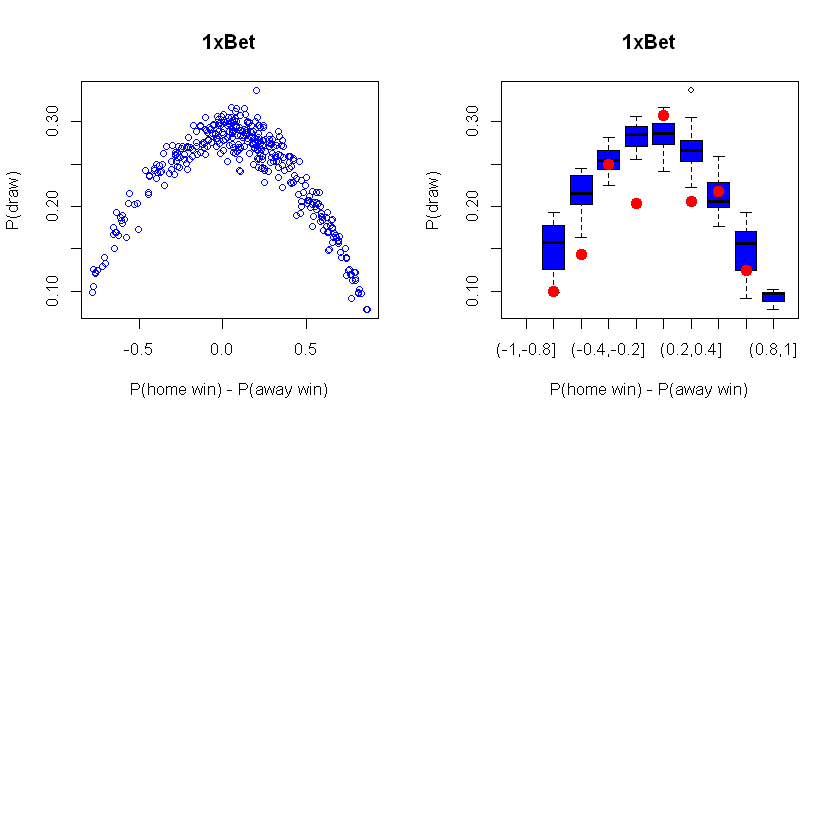

In [182]:
#Dataframes are combined into one dataframe and plot of the bookmaker 1xBet is drawn below.
#Here, boxplots represent the probabilities which are proposed by the bookmaker in corresponding bin; 
#also, red points represent probabilities which are calculated from sample.
task2_b1_result = select(task2_b1_result, -home_win, -away_win, -draw, -sum)
task2_b1_data = left_join(x=task2_b1_data, y=task2_b1_result, by="bin")
par(mfrow=c(2,2))
plot(task2_b1_data$norm_odd_x~task2_b1_data$difference, 
     col="blue",
     xlab="P(home win) - P(away win)",
     ylab = "P(draw)",
     main ="1xBet")
plot(task2_b1_data$norm_odd_x~task2_b1_data$bin, 
     col="blue",
     xlab="P(home win) - P(away win)",
     ylab = "P(draw)",
     main ="1xBet")
points(task2_b1_result$draw_prob~task2_b1_result$bin, col="red", lwd = 5)

In [183]:
#Conclusion for 1xBet bookmaker : It seems there isn't bias in odds representing the probabilities.
#Since some red points(draw probabilities calculated for each bin) are being under the mean of the probabilities which are 
#proposed by the bookmaker, some of them are being over. Therefore, it isn't clear that there is bias.
#Since draw probability calculated for each bin is greater than the mean of probability which is proposed by 1xBet, 
#one can potentially make money in the long run by betting on “Draw” for the games whose odds reside in (0, 0.2) and (0.4, 0.6) 
#bins.

# Task 2 - Bookmaker2 = 18bet

In [188]:
#18bet is chosen as second bookmaker.
task2_bookmaker2 = filter(task2_data, odd_bookmakers == "18bet")

In [189]:
#Normalization is calculated as following :
task2_bookmaker2 = select(task2_bookmaker2, -odd_bookmakers, -match_result)
task2_b2_data = dcast(task2_bookmaker2, match_id + date ~ variable, value.var = "probability")
task2_b2_data$sum = task2_b2_data$odd_1 + task2_b2_data$odd_x + task2_b2_data$odd_2
task2_b2_data$norm_odd_1 = task2_b2_data$odd_1 / task2_b2_data$sum
task2_b2_data$norm_odd_2 = task2_b2_data$odd_2 / task2_b2_data$sum
task2_b2_data$norm_odd_x = task2_b2_data$odd_x / task2_b2_data$sum

In [190]:
#P(home win) - P(away win) values are calculated and are discretized into bins as following :
task2_b2_data$difference = task2_b2_data$norm_odd_1 - task2_b2_data$norm_odd_2
task2_b2_data = select(task2_b2_data, match_id, norm_odd_1, norm_odd_x, norm_odd_2, difference)
task2_b2_data  = left_join(x=task2_b2_data, y=result, by = "match_id", all.x =TRUE)
task2_b2_data$bin = cut(task2_b2_data$difference,breaks = seq(-1,1,0.2))

In [191]:
#P(draw) is calculated as following :
task2_b2_result = select(task2_b2_data, -match_id, -norm_odd_1, -norm_odd_x, -norm_odd_2, -difference)
task2_b2_result = dcast(task2_b2_result, bin~match_result)
colnames(task2_b2_result) = c("bin","home_win","away_win","draw")
task2_b2_result$sum = task2_b2_result$home_win + task2_b2_result$away_win + task2_b2_result$draw
task2_b2_result$draw_prob = task2_b2_result$draw/task2_b2_result$sum


Using bin as value column: use value.var to override.
Aggregation function missing: defaulting to length


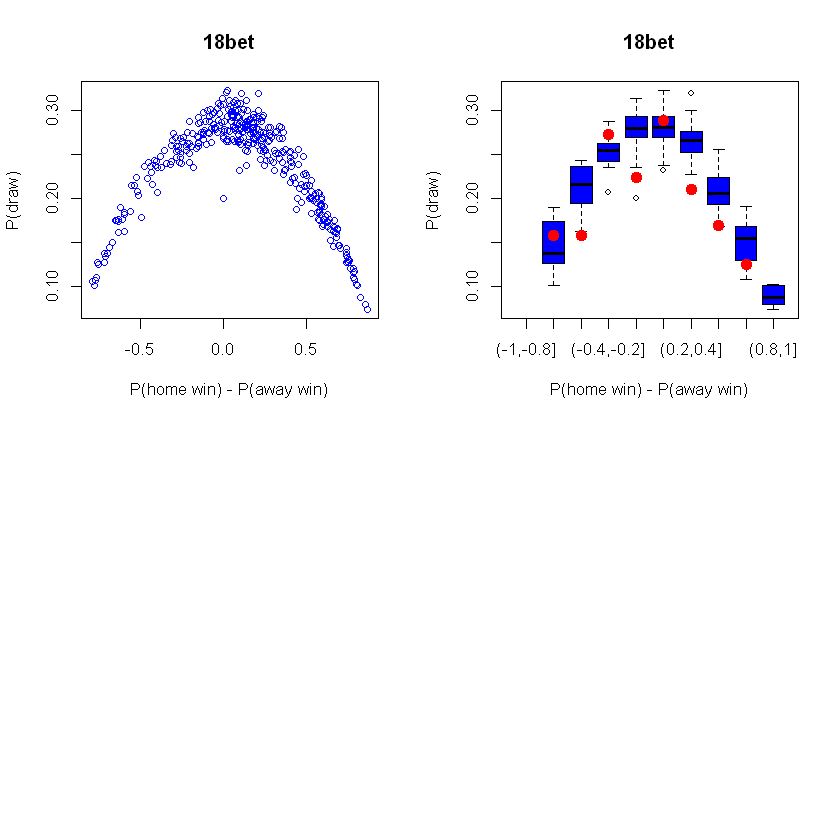

In [192]:
#Dataframes are combined into one dataframe and plot of the bookmaker 1xBet is drawn below.
#Here, boxplots represent the probabilities which are proposed by the bookmaker in corresponding bin; 
#also, red points represent probabilities which are calculated from sample.
task2_b2_result = select(task2_b2_result, -home_win, -away_win, -draw, -sum)
task2_b2_data = left_join(x=task2_b2_data, y=task2_b2_result, by="bin")
par(mfrow=c(2,2))
plot(task2_b2_data$norm_odd_x~task2_b2_data$difference, 
     col="blue",
     xlab="P(home win) - P(away win)",
     ylab = "P(draw)",
     main ="18bet")
plot(task2_b2_data$norm_odd_x~task2_b2_data$bin, 
     col="blue",
     xlab="P(home win) - P(away win)",
     ylab = "P(draw)",
     main ="18bet")
points(task2_b2_result$draw_prob~task2_b2_result$bin, col="red", lwd = 5)

In [ ]:
#Conclusion for 18bet bookmaker : It seems there isn't bias in odds representing the probabilities again.
#Since some red points(draw probabilities calculated for each bin) are being under the mean of the probabilities which are 
#proposed by the bookmaker, some of them are being over. Therefore, it isn't clear that there is bias.
#Since draw probability calculated for each bin is greater than the mean of probability which is proposed by 18bet, 
#one can potentially make money in the long run by betting on “Draw” for the games whose odds reside in (-0.8, -0.6], 
#(-0.4, -0.2] and (0, 0.2] bins.

# Task 2 - Bookmaker3 = Marathonbet

In [193]:
#Marathonbet is chosen as third bookmaker.
task2_bookmaker3 = filter(task2_data, odd_bookmakers == "Marathonbet")

In [194]:
#Normalization is calculated as following :
task2_bookmaker3 = select(task2_bookmaker3, -odd_bookmakers, -match_result)
task2_b3_data = dcast(task2_bookmaker3, match_id + date ~ variable, value.var = "probability")
task2_b3_data$sum = task2_b3_data$odd_1 + task2_b3_data$odd_x + task2_b3_data$odd_2
task2_b3_data$norm_odd_1 = task2_b3_data$odd_1 / task2_b3_data$sum
task2_b3_data$norm_odd_2 = task2_b3_data$odd_2 / task2_b3_data$sum
task2_b3_data$norm_odd_x = task2_b3_data$odd_x / task2_b3_data$sum

In [195]:
#P(home win) - P(away win) values are calculated and are discretized into bins as following :
task2_b3_data$difference = task2_b3_data$norm_odd_1 - task2_b3_data$norm_odd_2
task2_b3_data = select(task2_b3_data, match_id, norm_odd_1, norm_odd_x, norm_odd_2, difference)
task2_b3_data  = left_join(x=task2_b3_data, y=result, by = "match_id", all.x =TRUE)
task2_b3_data$bin = cut(task2_b3_data$difference,breaks = seq(-1,1,0.2))

In [196]:
#P(draw) is calculated as following :
task2_b3_result = select(task2_b3_data, -match_id, -norm_odd_1, -norm_odd_x, -norm_odd_2, -difference)
task2_b3_result = dcast(task2_b3_result, bin~match_result)
colnames(task2_b3_result) = c("bin","home_win","away_win","draw")
task2_b3_result$sum = task2_b3_result$home_win + task2_b3_result$away_win + task2_b3_result$draw
task2_b3_result$draw_prob = task2_b3_result$draw/task2_b3_result$sum


Using bin as value column: use value.var to override.
Aggregation function missing: defaulting to length


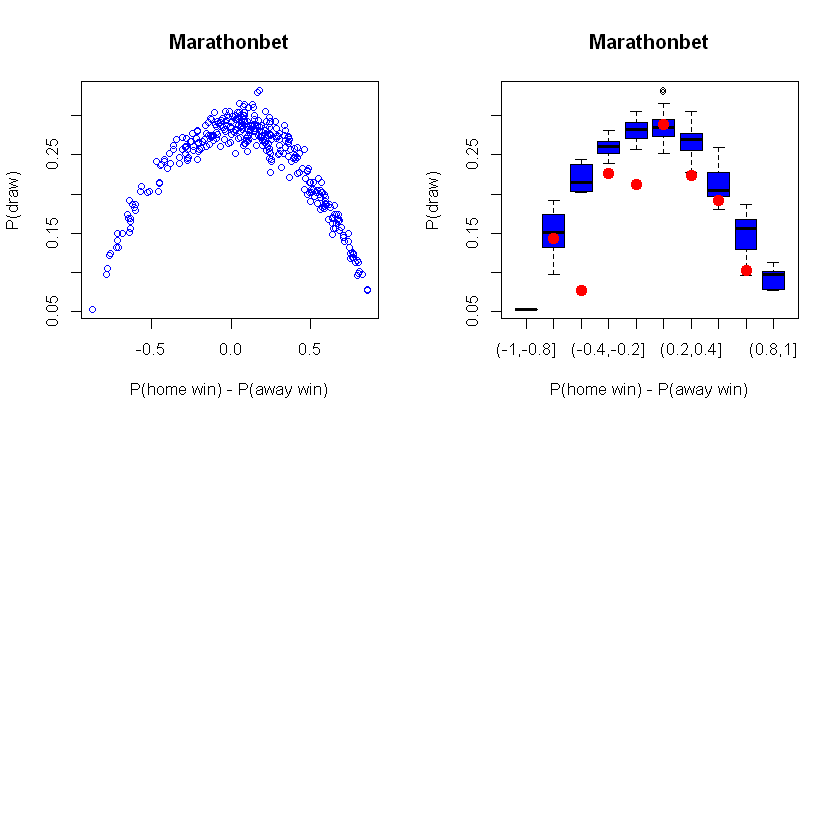

In [197]:
#Dataframes are combined into one dataframe and plot of the bookmaker 1xBet is drawn below.
#Here, boxplots represent the probabilities which are proposed by the bookmaker in corresponding bin; 
#also, red points represent probabilities which are calculated from sample.
task2_b3_result = select(task2_b3_result, -home_win, -away_win, -draw, -sum)
task2_b3_data = left_join(x=task2_b3_data, y=task2_b3_result, by="bin")
par(mfrow=c(2,2))
plot(task2_b3_data$norm_odd_x~task2_b3_data$difference, 
     col="blue",
     xlab="P(home win) - P(away win)",
     ylab = "P(draw)",
     main ="Marathonbet")
plot(task2_b3_data$norm_odd_x~task2_b3_data$bin, 
     col="blue",
     xlab="P(home win) - P(away win)",
     ylab = "P(draw)",
     main ="Marathonbet")
points(task2_b3_result$draw_prob~task2_b3_result$bin, col="red", lwd = 5)

In [ ]:
#Conclusion for Marathonbet bookmaker : It seems there isn't bias in odds representing the probabilities again.
#Since some red points(draw probabilities calculated for each bin) are being under the mean of the probabilities which are 
#proposed by the bookmaker, some of them are being over. Therefore, it isn't clear that there is bias.
#Since draw probability calculated for each bin isn't greater than the any mean of probability which is proposed by Marathonbet, 
#noone can potentially make money in the long run by betting on “Draw” for the games in any bin.

# Task 2 - Bookmaker4 = Bethard

In [198]:
#Bethard is chosen as forth bookmaker.
task2_bookmaker4 = filter(task2_data, odd_bookmakers == "Bethard")

In [199]:
#Normalization is calculated as following :
task2_bookmaker4 = select(task2_bookmaker4, -odd_bookmakers, -match_result)
task2_b4_data = dcast(task2_bookmaker4, match_id + date ~ variable, value.var = "probability")
task2_b4_data$sum = task2_b4_data$odd_1 + task2_b4_data$odd_x + task2_b4_data$odd_2
task2_b4_data$norm_odd_1 = task2_b4_data$odd_1 / task2_b4_data$sum
task2_b4_data$norm_odd_2 = task2_b4_data$odd_2 / task2_b4_data$sum
task2_b4_data$norm_odd_x = task2_b4_data$odd_x / task2_b4_data$sum

In [200]:
#P(home win) - P(away win) values are calculated and are discretized into bins as following :
task2_b4_data$difference = task2_b4_data$norm_odd_1 - task2_b4_data$norm_odd_2
task2_b4_data = select(task2_b4_data, match_id, norm_odd_1, norm_odd_x, norm_odd_2, difference)
task2_b4_data  = left_join(x=task2_b4_data, y=result, by = "match_id", all.x =TRUE)
task2_b4_data$bin = cut(task2_b4_data$difference,breaks = seq(-1,1,0.2))

In [201]:
#P(draw) is calculated as following :
task2_b4_result = select(task2_b4_data, -match_id, -norm_odd_1, -norm_odd_x, -norm_odd_2, -difference)
task2_b4_result = dcast(task2_b4_result, bin~match_result)
colnames(task2_b4_result) = c("bin","home_win","away_win","draw")
task2_b4_result$sum = task2_b4_result$home_win + task2_b4_result$away_win + task2_b4_result$draw
task2_b4_result$draw_prob = task2_b4_result$draw/task2_b4_result$sum


Using bin as value column: use value.var to override.
Aggregation function missing: defaulting to length


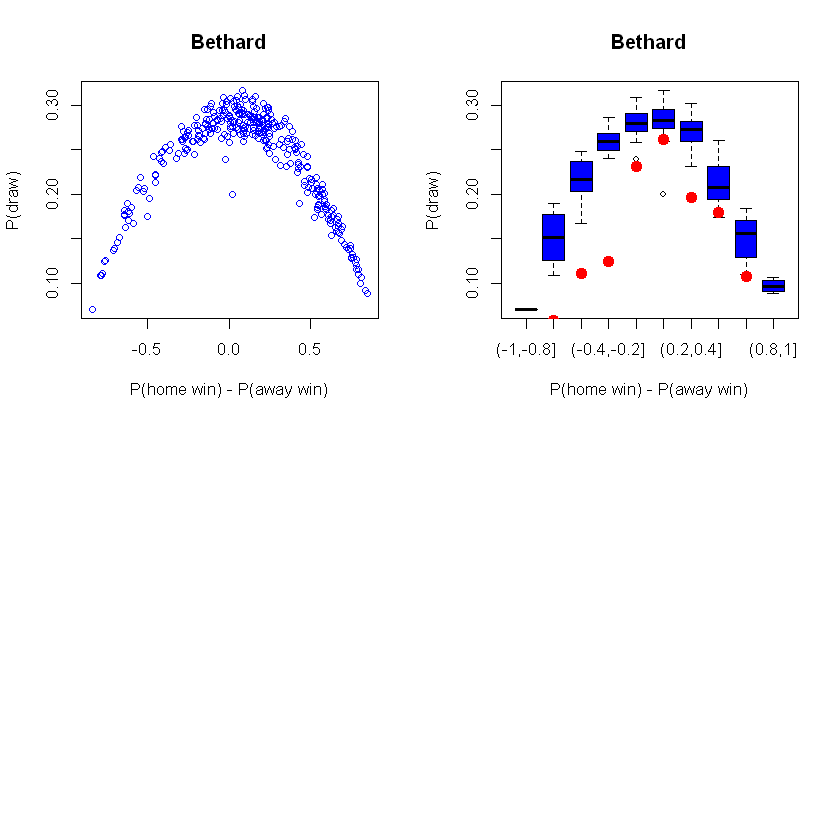

In [202]:
#Dataframes are combined into one dataframe and plot of the bookmaker 1xBet is drawn below.
#Here, boxplots represent the probabilities which are proposed by the bookmaker in corresponding bin; 
#also, red points represent probabilities which are calculated from sample.
task2_b4_result = select(task2_b4_result, -home_win, -away_win, -draw, -sum)
task2_b4_data = left_join(x=task2_b4_data, y=task2_b4_result, by="bin")
par(mfrow=c(2,2))
plot(task2_b4_data$norm_odd_x~task2_b4_data$difference, 
     col="blue",
     xlab="P(home win) - P(away win)",
     ylab = "P(draw)",
     main ="Bethard")
plot(task2_b4_data$norm_odd_x~task2_b4_data$bin, 
     col="blue",
     xlab="P(home win) - P(away win)",
     ylab = "P(draw)",
     main ="Bethard")
points(task2_b4_result$draw_prob~task2_b4_result$bin, col="red", lwd = 5)

In [ ]:
#Conclusion for Bethard bookmaker : It seems there is bias in odds representing the probabilities.
#Since all red points(draw probabilities calculated for each bin) are being under the mean of the probabilities which are 
#proposed by the bookmaker. It is can be said that there is bias for Bethard's odds according to this data set.
#Since draw probability calculated for each bin isn't greater than the any mean of probability which is proposed by Bethard, 
#noone can potentially make money in the long run by betting on “Draw” for the games in any bin.

# Task 3

### Determining the matches which will be removed and calculating the number of these matches

In [281]:
#Here, the matches in which a team critical score after 90th minute are going to be determined as following : 
task3_goals = separate (goals, score, into = c("home_score", "away_score"), sep = " - " , remove = TRUE)
task3_goals = select(task3_goals, match_id, time, home_score, away_score)
task3_goals$time = as.numeric(task3_goals$time) 
task3_goals$home_score = as.numeric(task3_goals$home_score)
task3_goals$away_score = as.numeric(task3_goals$away_score)
last_minute_score = task3_goals[task3_goals$time > 90 & task3_goals$home_score+1==task3_goals$away_score,]
last_minute_score = rbind(last_minute_score, task3_goals[task3_goals$time>90 & task3_goals$home_score-1==task3_goals$away_score,])
last_minute_score = rbind(last_minute_score, task3_goals[task3_goals$time>90 & task3_goals$home_score==task3_goals$away_score,])


In [282]:
#Number of matches which are removed due to last minute score is calculated as following:
last_minute_score$decision_x = "remove"
last_minute_score = select(last_minute_score, match_id, decision_x)
task3_data = left_join(x=task2_data, y=last_minute_score, by="match_id")
no_of_removal_due_to_last_minute_score = nrow(distinct(select(filter(task3_data, decision_x == "remove"), match_id))) 
no_of_removal_due_to_last_minute_score
#Therefore, 56 matches are removed in dataframe because of critical score after 90th minute.




[1] 56

In [283]:
#Here, the matches in which a team gets red card in 15 minutes are going to be determined as following :
task3_booking = select(booking, match_id, time, card)
colnames(task3_booking) = c("match_id", "card_time", "card")
task3_booking$card_time = as.numeric(task3_booking$card_time)
red_card_at_the_beginning = task3_booking[task3_booking$card_time <= 15 & task3_booking$card == "red card",] 


In [284]:
#Number of matches which are removed due to red card in 15 minutes is calculated as following:
red_card_at_the_beginning$decision_y = "remove"
red_card_at_the_beginning = select(red_card_at_the_beginning, match_id, decision_y)
task3_data = left_join(x=task3_data, y=red_card_at_the_beginning, by="match_id")
no_of_removal_due_to_red_card_at_the_beginning = nrow(distinct(select(filter(task3_data, decision_y == "remove"), match_id))) #2
no_of_removal_due_to_red_card_at_the_beginning
#Therefore, 2 matches are removed in dataframe because of red card in 15 minutes.


[1] 2

In [285]:
#Determined matches are removed as following :
task3_data$decision = ifelse(task3_data$decision_x == "remove" | task3_data$decision_y == "remove", "remove", "don't remove")
task3_data = filter(task3_data, !mapply(identical, decision, "remove"))
task3_data = select(task3_data, match_id, date, odd_bookmakers, match_result, variable, probability)


In [286]:
#Number of matches before and removal is calculated as following :
no_of_matches_before_removal =nrow(distinct(select(task2_data, match_id))) 
no_of_matches=nrow(distinct(select(task3_data, match_id))) 


In [287]:
no_of_matches_before_removal

[1] 277

In [290]:
no_of_matches

[1] 219

In [261]:
#Conclusion : There are 277 matches before removal. 
#56 matches are removed due to critical score after 90th minute.
#Moreover, 2 matches are removed due to red card in 15 minutes of the match. 
#As a result, there are 219 matches after removal. 

# Task 3 - Bookmaker1 = 1xBet

In [ ]:
#The codes which are explained in Task2 are implemented again  :

Using bin as value column: use value.var to override.
Aggregation function missing: defaulting to length


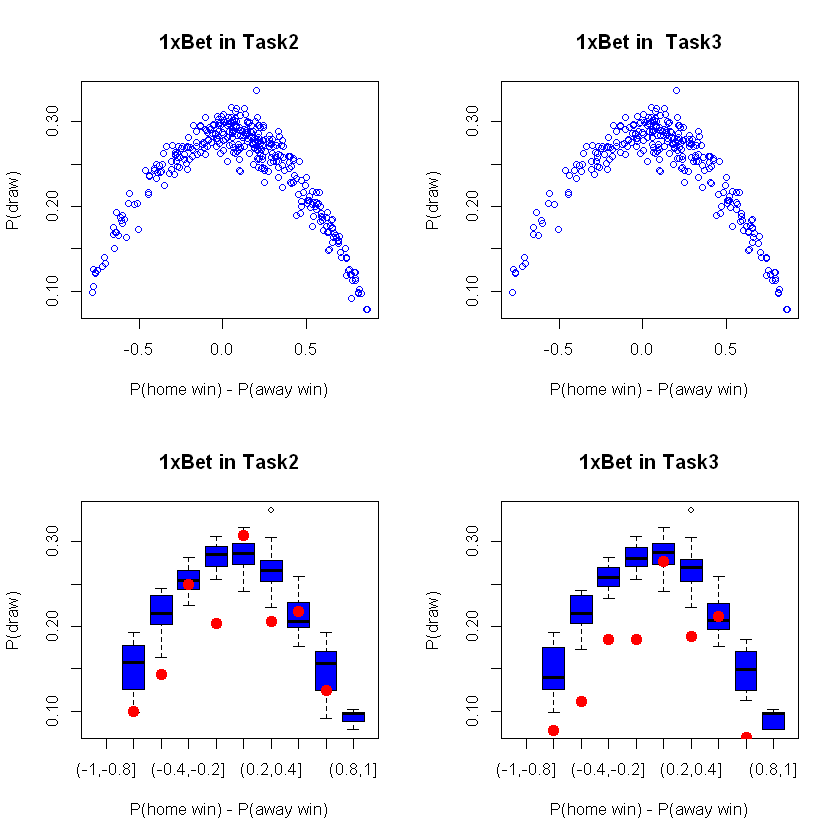

In [291]:
#18bet was chosen as the first bookmaker.
task3_bookmaker1 = filter(task3_data, odd_bookmakers == "1xBet")

#Normalization is calculated as following :
task3_bookmaker1 = select(task3_bookmaker1, -odd_bookmakers, -match_result)
task3_b1_data = dcast(task3_bookmaker1, match_id + date ~ variable, value.var = "probability")
task3_b1_data$sum = task3_b1_data$odd_1 + task3_b1_data$odd_x + task3_b1_data$odd_2
task3_b1_data$norm_odd_1 = task3_b1_data$odd_1 / task3_b1_data$sum
task3_b1_data$norm_odd_2 = task3_b1_data$odd_2 / task3_b1_data$sum
task3_b1_data$norm_odd_x = task3_b1_data$odd_x / task3_b1_data$sum

#P(home win) - P(away win) values are calculated and are discretized into bins as following :
task3_b1_data$difference = task3_b1_data$norm_odd_1 - task3_b1_data$norm_odd_2
task3_b1_data = select(task3_b1_data, match_id, norm_odd_1, norm_odd_x, norm_odd_2, difference)
task3_b1_data  = left_join(x=task3_b1_data, y=result, by = "match_id", all.x =TRUE)
task3_b1_data$bin = cut(task3_b1_data$difference,breaks = seq(-1,1,0.2))

#P(draw) is calculated as following :
task3_b1_result = select(task3_b1_data, -match_id, -norm_odd_1, -norm_odd_x, -norm_odd_2, -difference)
task3_b1_result = dcast(task3_b1_result, bin~match_result)
colnames(task3_b1_result) = c("bin","home_win","away_win","draw")
task3_b1_result$sum = task3_b1_result$home_win + task3_b1_result$away_win + task3_b1_result$draw
task3_b1_result$draw_prob = task3_b1_result$draw/task3_b1_result$sum

#Dataframes are combined into one dataframe and plot of the bookmaker 1xBet is drawn below.
#Here, boxplots represent the probabilities which are proposed by the bookmaker in corresponding bin; 
#also, red points represent probabilities which are calculated from sample.
task3_b1_result = select(task3_b1_result, -home_win, -away_win, -draw, -sum)
task3_b1_data = left_join(x=task3_b1_data, y=task3_b1_result, by="bin")
par(mfrow=c(2,2))

plot(task2_b1_data$norm_odd_x~task2_b1_data$difference, 
     col="blue",
     xlab="P(home win) - P(away win)",
     ylab = "P(draw)",
     main ="1xBet in Task2")
plot(task3_b1_data$norm_odd_x~task3_b1_data$difference, 
     col="blue",
     xlab="P(home win) - P(away win)",
     ylab = "P(draw)",
     main ="1xBet in  Task3")
plot(task2_b1_data$norm_odd_x~task2_b1_data$bin, 
     col="blue",
     xlab="P(home win) - P(away win)",
     ylab = "P(draw)",
     main ="1xBet in Task2")
points(task2_b1_result$draw_prob~task2_b1_result$bin, col="red", lwd = 5)
plot(task3_b1_data$norm_odd_x~task3_b1_data$bin, 
     col="blue",
     xlab="P(home win) - P(away win)",
     ylab = "P(draw)",
     main ="1xBet in Task3")
points(task3_b1_result$draw_prob~task3_b1_result$bin, col="red", lwd = 5)

In [ ]:
#Conclusion for 1xBet bookmaker : It seems there isn't bias in odds representing the probabilities in task2, and also 
#it isn't clear that there is biased in task3 too.
#(0, 0.2) and (0.4, 0.6) bins are determined as potentially make money areas in task2; however, there isn't any bin such 
#making money area, since any draw probability calculated for each bin isn't greater than the mean of probability which is 
#proposed by 1xBet.

# Task 3 - Bookmaker2 = 18bet

In [ ]:
#The codes which are explained in Task2 are implemented again  :

Using bin as value column: use value.var to override.
Aggregation function missing: defaulting to length


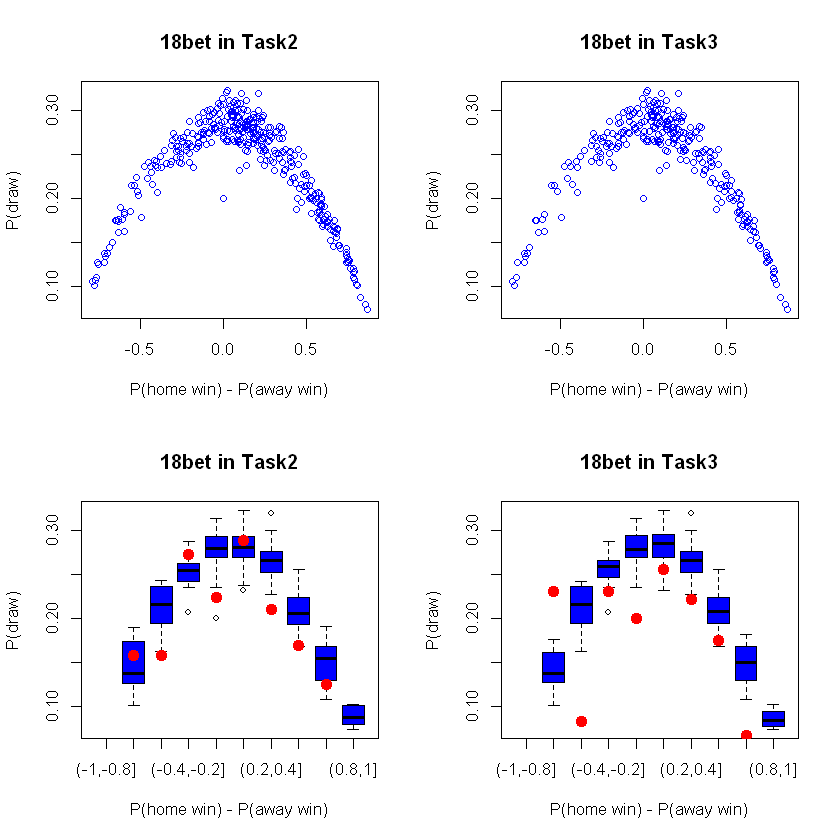

In [292]:
#18bet was chosen as second bookmaker.
task3_bookmaker2 = filter(task3_data, odd_bookmakers == "18bet")

#Normalization is calculated as following :
task3_bookmaker2 = select(task3_bookmaker2, -odd_bookmakers, -match_result)
task3_b2_data = dcast(task3_bookmaker2, match_id + date ~ variable, value.var = "probability")
task3_b2_data$sum = task3_b2_data$odd_1 + task3_b2_data$odd_x + task3_b2_data$odd_2
task3_b2_data$norm_odd_1 = task3_b2_data$odd_1 / task3_b2_data$sum
task3_b2_data$norm_odd_2 = task3_b2_data$odd_2 / task3_b2_data$sum
task3_b2_data$norm_odd_x = task3_b2_data$odd_x / task3_b2_data$sum

#P(home win) - P(away win) values are calculated and are discretized into bins as following :
task3_b2_data$difference = task3_b2_data$norm_odd_1 - task3_b2_data$norm_odd_2
task3_b2_data = select(task3_b2_data, match_id, norm_odd_1, norm_odd_x, norm_odd_2, difference)
task3_b2_data  = left_join(x=task3_b2_data, y=result, by = "match_id", all.x =TRUE)
task3_b2_data$bin = cut(task3_b2_data$difference,breaks = seq(-1,1,0.2))

#P(draw) is calculated as following :
task3_b2_result = select(task3_b2_data, -match_id, -norm_odd_1, -norm_odd_x, -norm_odd_2, -difference)
task3_b2_result = dcast(task3_b2_result, bin~match_result)
colnames(task3_b2_result) = c("bin","home_win","away_win","draw")
task3_b2_result$sum = task3_b2_result$home_win + task3_b2_result$away_win + task3_b2_result$draw
task3_b2_result$draw_prob = task3_b2_result$draw/task3_b2_result$sum

#Dataframes are combined into one dataframe and plot of the bookmaker 1xBet is drawn below.
#Here, boxplots represent the probabilities which are proposed by the bookmaker in corresponding bin; 
#also, red points represent probabilities which are calculated from sample.
task3_b2_result = select(task3_b2_result, -home_win, -away_win, -draw, -sum)
task3_b2_data = left_join(x=task3_b2_data, y=task3_b2_result, by="bin")
par(mfrow=c(2,2))
plot(task2_b2_data$norm_odd_x~task2_b2_data$difference, 
     col="blue",
     xlab="P(home win) - P(away win)",
     ylab = "P(draw)",
     main ="18bet in Task2")
plot(task3_b2_data$norm_odd_x~task3_b2_data$difference, 
     col="blue",
     xlab="P(home win) - P(away win)",
     ylab = "P(draw)",
     main ="18bet in Task3")
plot(task2_b2_data$norm_odd_x~task2_b2_data$bin, 
     col="blue",
     xlab="P(home win) - P(away win)",
     ylab = "P(draw)",
     main ="18bet in Task2")
points(task2_b2_result$draw_prob~task2_b2_result$bin, col="red", lwd = 5)
plot(task3_b2_data$norm_odd_x~task3_b2_data$bin, 
     col="blue",
     xlab="P(home win) - P(away win)",
     ylab = "P(draw)",
     main ="18bet in Task3")
points(task3_b2_result$draw_prob~task3_b2_result$bin, col="red", lwd = 5)

In [296]:
#Conclusion for 18bet bookmaker : While it seems there isn't bias in odds representing the probabilities in task2,
#all red points(draw probabilities calculated for each bin) but only one, which is in (-0.8, -0.6), are lower than the mean of 
#probabilities proposed by the bookmaker in task3. However, due to this point, it isn't clearly said that there is bias for 
#this data set.
#(-0.8, -0.6], (-0.4, -0.2] and (0, 0.2] bins are determined as potentially making money areas in task2, 
#only (-0.8,-0.6] bin can be marked as such making money area, since draw probability which is calculated is greater than 
#the probability which is proposed by the bookmaker for corresponding bin in task3.

# Task 3 - Bookmaker3 = Marathonbet

In [ ]:
#The codes which are explained in Task2 are implemented again  :

Using bin as value column: use value.var to override.
Aggregation function missing: defaulting to length


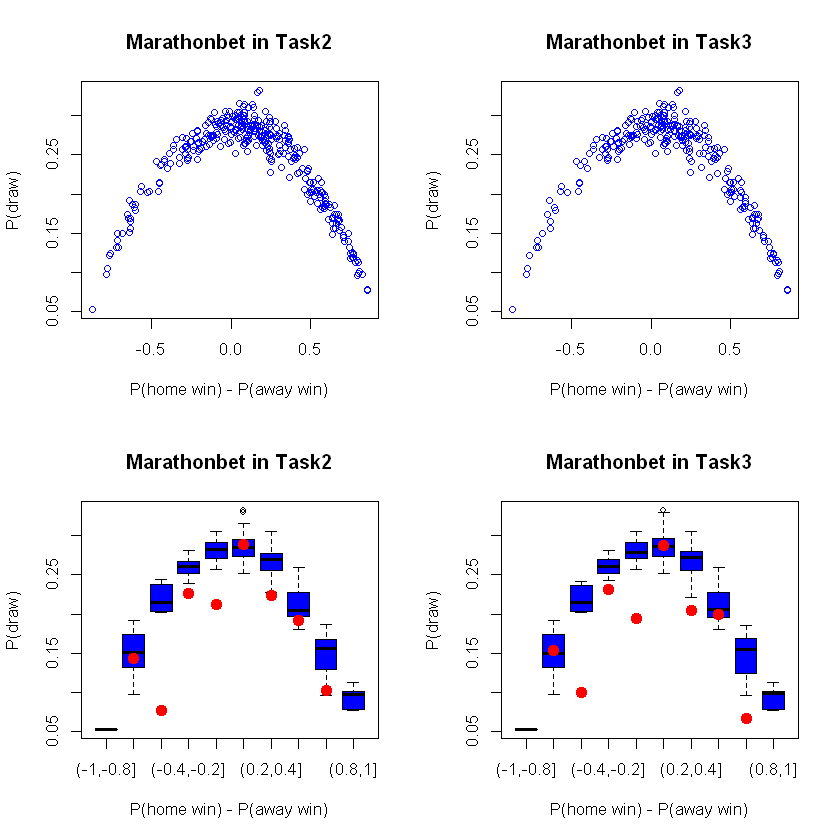

In [293]:
#Marathonbet was chosen as third bookmaker.
task3_bookmaker3 = filter(task3_data, odd_bookmakers == "Marathonbet")

#Normalization is calculated as following :
task3_bookmaker3 = select(task3_bookmaker3, -odd_bookmakers, -match_result)
task3_b3_data = dcast(task3_bookmaker3, match_id + date ~ variable, value.var = "probability")
task3_b3_data$sum = task3_b3_data$odd_1 + task3_b3_data$odd_x + task3_b3_data$odd_2
task3_b3_data$norm_odd_1 = task3_b3_data$odd_1 / task3_b3_data$sum
task3_b3_data$norm_odd_2 = task3_b3_data$odd_2 / task3_b3_data$sum
task3_b3_data$norm_odd_x = task3_b3_data$odd_x / task3_b3_data$sum

#P(home win) - P(away win) values are calculated and are discretized into bins as following :
task3_b3_data$difference = task3_b3_data$norm_odd_1 - task3_b3_data$norm_odd_2
task3_b3_data = select(task3_b3_data, match_id, norm_odd_1, norm_odd_x, norm_odd_2, difference)
task3_b3_data  = left_join(x=task3_b3_data, y=result, by = "match_id", all.x =TRUE)
task3_b3_data$bin = cut(task3_b3_data$difference,breaks = seq(-1,1,0.2))

#P(draw) is calculated as following :
task3_b3_result = select(task3_b3_data, -match_id, -norm_odd_1, -norm_odd_x, -norm_odd_2, -difference)
task3_b3_result = dcast(task3_b3_result, bin~match_result)
colnames(task3_b3_result) = c("bin","home_win","away_win","draw")
task3_b3_result$sum = task3_b3_result$home_win + task3_b3_result$away_win + task3_b3_result$draw
task3_b3_result$draw_prob = task3_b3_result$draw/task3_b3_result$sum

#Dataframes are combined into one dataframe and plot of the bookmaker 1xBet is drawn below.
#Here, boxplots represent the probabilities which are proposed by the bookmaker in corresponding bin; 
#also, red points represent probabilities which are calculated from sample.
task3_b3_result = select(task3_b3_result, -home_win, -away_win, -draw, -sum)
task3_b3_data = left_join(x=task3_b3_data, y=task3_b3_result, by="bin")
par(mfrow=c(2,2))
plot(task2_b3_data$norm_odd_x~task2_b3_data$difference, 
     col="blue",
     xlab="P(home win) - P(away win)",
     ylab = "P(draw)",
     main ="Marathonbet in Task2")
plot(task3_b3_data$norm_odd_x~task3_b3_data$difference, 
     col="blue",
     xlab="P(home win) - P(away win)",
     ylab = "P(draw)",
     main ="Marathonbet in Task3")
plot(task2_b3_data$norm_odd_x~task2_b3_data$bin, 
     col="blue",
     xlab="P(home win) - P(away win)",
     ylab = "P(draw)",
     main ="Marathonbet in Task2")
points(task2_b3_result$draw_prob~task2_b3_result$bin, col="red", lwd = 5)
plot(task3_b3_data$norm_odd_x~task3_b3_data$bin, 
     col="blue",
     xlab="P(home win) - P(away win)",
     ylab = "P(draw)",
     main ="Marathonbet in Task3")
points(task3_b3_result$draw_prob~task3_b3_result$bin, col="red", lwd = 5)

In [ ]:
#Conclusion for Marathonbet bookmaker : It seems there isn't bias in odds representing the probabilities in task2,
#similarly, it is clear that there isn't bias in task3 too. Since some red points(draw probabilities calculated for each bin) 
#are being under the mean of the probabilities which are proposed by the bookmaker, some of them are being over. 
#Since draw probability calculated for each bin isn't greater than the any mean of probability which is proposed by Marathonbet, 
#noone can potentially make money in the long run by betting on “Draw” for the games in any bin for both task 2 and task3.
#Therefore, removing the matches doesn't affect this bookmaker so much when the graphs are examined.

# Task 3 - Bookmaker4 = Bethard

In [ ]:
#The codes which are explained in Task2 are implemented again  :

Using bin as value column: use value.var to override.
Aggregation function missing: defaulting to length


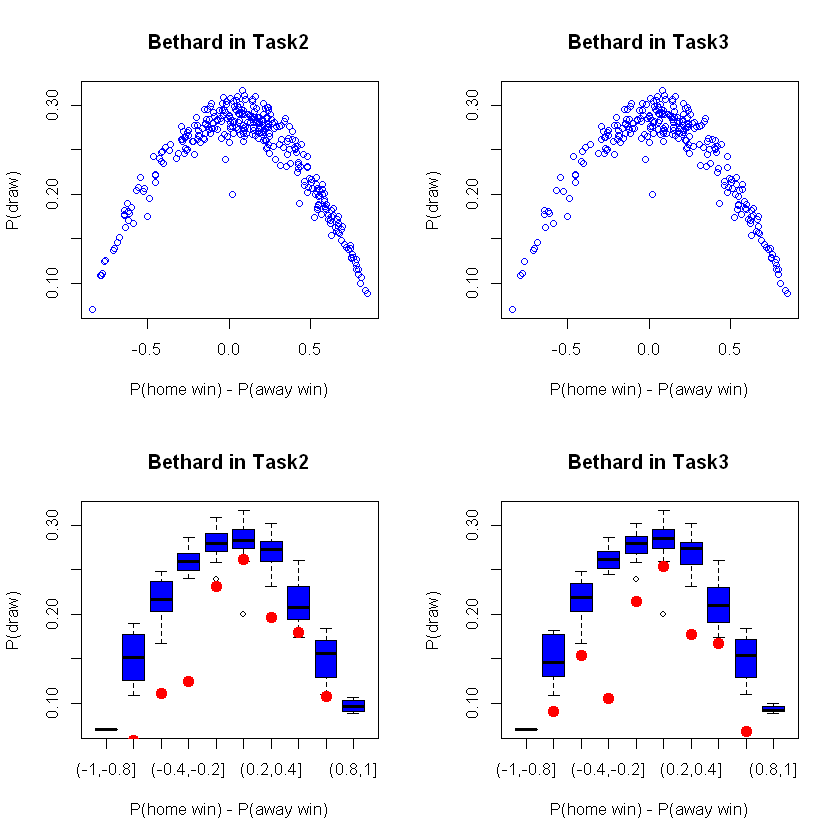

In [294]:
#Bethard was chosen as forth bookmaker.
task3_bookmaker4 = filter(task3_data, odd_bookmakers == "Bethard")

#Normalization is calculated as following :
task3_bookmaker4 = select(task3_bookmaker4, -odd_bookmakers, -match_result)
task3_b4_data = dcast(task3_bookmaker4, match_id + date ~ variable, value.var = "probability")
task3_b4_data$sum = task3_b4_data$odd_1 + task3_b4_data$odd_x + task3_b4_data$odd_2
task3_b4_data$norm_odd_1 = task3_b4_data$odd_1 / task3_b4_data$sum
task3_b4_data$norm_odd_2 = task3_b4_data$odd_2 / task3_b4_data$sum
task3_b4_data$norm_odd_x = task3_b4_data$odd_x / task3_b4_data$sum

#P(home win) - P(away win) values are calculated and are discretized into bins as following :
task3_b4_data$difference = task3_b4_data$norm_odd_1 - task3_b4_data$norm_odd_2
task3_b4_data = select(task3_b4_data, match_id, norm_odd_1, norm_odd_x, norm_odd_2, difference)
task3_b4_data  = left_join(x=task3_b4_data, y=result, by = "match_id", all.x =TRUE)
task3_b4_data$bin = cut(task3_b4_data$difference,breaks = seq(-1,1,0.2))

#P(draw) is calculated as following :
task3_b4_result = select(task3_b4_data, -match_id, -norm_odd_1, -norm_odd_x, -norm_odd_2, -difference)
task3_b4_result = dcast(task3_b4_result, bin~match_result)
colnames(task3_b4_result) = c("bin","home_win","away_win","draw")
task3_b4_result$sum = task3_b4_result$home_win + task3_b4_result$away_win + task3_b4_result$draw
task3_b4_result$draw_prob = task3_b4_result$draw/task3_b4_result$sum

#Dataframes are combined into one dataframe and plot of the bookmaker 1xBet is drawn below.
#Here, boxplots represent the probabilities which are proposed by the bookmaker in corresponding bin; 
#also, red points represent probabilities which are calculated from sample.
task3_b4_result = select(task3_b4_result, -home_win, -away_win, -draw, -sum)
task3_b4_data = left_join(x=task3_b4_data, y=task3_b4_result, by="bin")
par(mfrow=c(2,2))
plot(task2_b4_data$norm_odd_x~task2_b4_data$difference, 
     col="blue",
     xlab="P(home win) - P(away win)",
     ylab = "P(draw)",
     main ="Bethard in Task2")
plot(task3_b4_data$norm_odd_x~task3_b4_data$difference, 
     col="blue",
     xlab="P(home win) - P(away win)",
     ylab = "P(draw)",
     main ="Bethard in Task3")
plot(task2_b4_data$norm_odd_x~task2_b4_data$bin, 
     col="blue",
     xlab="P(home win) - P(away win)",
     ylab = "P(draw)",
     main ="Bethard in Task2")
points(task2_b4_result$draw_prob~task2_b4_result$bin, col="red", lwd = 5)
plot(task3_b4_data$norm_odd_x~task3_b4_data$bin, 
     col="blue",
     xlab="P(home win) - P(away win)",
     ylab = "P(draw)",
     main ="Bethard in Task3")
points(task3_b4_result$draw_prob~task3_b4_result$bin, col="red", lwd = 5)


In [ ]:
#Conclusion for Bethard bookmaker : It seems there is bias in odds representing the probabilities in task2.
#Since all red points(draw probabilities calculated for each bin) are being under the mean of the probabilities which are 
#proposed by the bookmaker. It is can be said that there is bias for Bethard's odds according to this data set.
#The result is the same for the task3 too.
#Since draw probability calculated for each bin isn't greater than the any mean of probability which is proposed by Bethard, 
#noone can potentially make money in the long run by betting on “Draw” for the games in any bin for both task2 ans task3.
#Therefore, removing matches doesn't affect the results for this bookmaker like Marathonbet and it can be observed that
#there is bias on the odds of Bethard bookmaker.